# Анализ аудиоданных для классификации

### Цель работы

Провести разведочный анализ аудиоданных (EDA) для задачи классификации.

### Используемые библиотеки

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm

## Загрузка аудиофайлов

Датасет организован в виде папок, где каждая папка соответствует отдельному классу.

In [2]:
train_dir = "data/"
classes = []
for class_name in os.listdir(train_dir):
  class_path = train_dir + class_name

  for audiofile in os.listdir(class_path):
    file_path = f'data/{class_name}/{audiofile}'
    audio, sr = librosa.load(file_path)
    classes.append([class_name, file_path, audio])

print(sr)

22050


In [3]:
class_counts_df = pd.DataFrame(classes, columns=['class', 'file', 'audio'])
class_counts_df

,class,file,audio
0,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ..."
1,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ..."
2,0,data/0/bass_acoustic_000-034-127 — копия (2).wav,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ..."
3,1,data/1/bass_acoustic_000-034-127 — копия (2).wav,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ..."
4,1,data/1/bass_acoustic_000-041-127.wav,"[6.336079e-09, 6.353741e-08, -3.3600763e-08, 5..."
5,2,data/2/bass_electronic_000-040-127.wav,"[-4.5286728e-07, -6.648918e-09, 5.466244e-07, ..."


Распределение файлов по классам позволяет выявить дисбаланс данных, который может повлиять на обучение модели.

In [4]:
class_counts_df['class'].value_counts()

class
0    3
1    2
2    1
Name: count, dtype: int64

Визуализируем временной сигнал одного аудиофайла для примера.

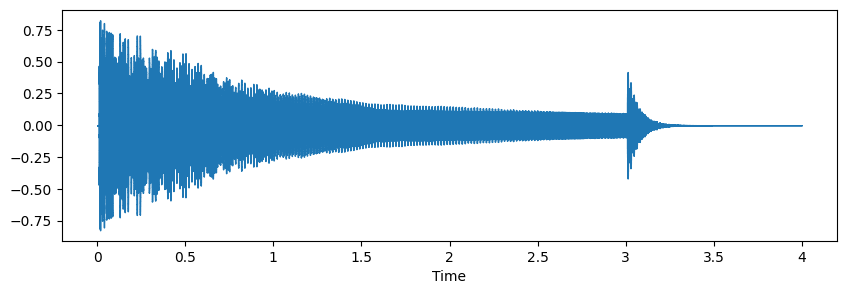

In [5]:
sample_audio = class_counts_df.loc[3, 'audio']

plt.figure(figsize=(10, 3))
librosa.display.waveshow(sample_audio, sr=sr)
plt.show()

## Описательные статистики

### Длительность аудио

In [6]:
class_counts_df['duration'] = class_counts_df['audio'].apply(lambda x: len(x) / sr)
class_counts_df.head(3)

,class,file,audio,duration
0,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0
1,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0
2,0,data/0/bass_acoustic_000-034-127 — копия (2).wav,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0


### Средняя громкость

In [7]:
class_counts_df['mean_loudness'] = class_counts_df['audio'].apply(lambda x: np.mean(np.abs(x)))
class_counts_df.head(3)

,class,file,audio,duration,mean_loudness
0,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.109181
1,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.109181
2,0,data/0/bass_acoustic_000-034-127 — копия (2).wav,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.109181


### Изменчивость громкости

In [8]:
class_counts_df['loudness_variability'] = class_counts_df['audio'].apply(lambda x: np.std(x))
class_counts_df.head(3)

,class,file,audio,duration,mean_loudness,loudness_variability
0,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.109181,0.169812
1,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.109181,0.169812
2,0,data/0/bass_acoustic_000-034-127 — копия (2).wav,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.109181,0.169812


### Максимальная громкость

In [9]:
class_counts_df['mean_loudness'] = class_counts_df['audio'].apply(lambda x: np.mean(np.max(x)))
class_counts_df.head(3)

,class,file,audio,duration,mean_loudness,loudness_variability
0,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.825982,0.169812
1,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.825982,0.169812
2,0,data/0/bass_acoustic_000-034-127 — копия (2).wav,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.825982,0.169812


## Отличительные характеристики классов на основе статистик

In [10]:
class_counts_df.groupby('class')[['duration', 'mean_loudness', 'loudness_variability']].mean()

,duration,mean_loudness,loudness_variability
class,,,
0,4.0,0.825982,0.169812
1,4.0,0.869883,0.152971
2,4.0,0.771697,0.192244


И тут мы оставляем вывод.

## Извлечение признаков (Features Extraction)


### Функция извлечения признаков

Извлекаем комплексные признаки из аудиосигнала: MFCC, Chroma, спектральный центроид, ширина полосы и rolloff.

In [11]:
def extract_features(y, sr=20050):
    # MFCC - 13 коэффициентов
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Хромограмма - 12 полутонов
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    # Центроид спектра
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    # Ширина спектра
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    # Спектральный роллофф
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    return np.concatenate([
        np.mean(mfcc, axis=1), np.std(mfcc, axis=1),
        np.mean(chroma, axis=1), np.std(chroma, axis=1),
        [np.mean(centroid), np.std(centroid)],
        [np.mean(bandwidth), np.std(bandwidth)],
        [np.mean(rolloff), np.std(rolloff)]
    ])

### Применение функции к аудиофайлам и добавление признаков в датафрейм


In [12]:
class_counts_df[[f"features_{i}" for i in range(1, 57)]] = class_counts_df['audio'].apply(extract_features).tolist()

class_counts_df.sample(2)

,class,file,audio,duration,mean_loudness,loudness_variability,features_1,features_2,features_3,features_4,...,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56
1,0,data/0/bass_acoustic_000-034-127 — копия (2) c...,"[2.5883642e-08, -4.375971e-08, -7.626547e-08, ...",4.0,0.825982,0.169812,-415.287201,74.013077,58.738693,50.503174,...,0.281330,0.316719,0.318094,0.278187,216.133881,479.696465,377.991339,549.804670,436.307521,1234.596435
5,2,data/2/bass_electronic_000-040-127.wav,"[-4.5286728e-07, -6.648918e-09, 5.466244e-07, ...",4.0,0.771697,0.192244,-469.169891,80.825264,69.064735,61.117954,...,0.271286,0.164452,0.222193,0.324728,820.961347,1348.038108,558.796903,742.010377,1347.630001,2234.560100


## Спектрограммы

### STFT-спектрограмма

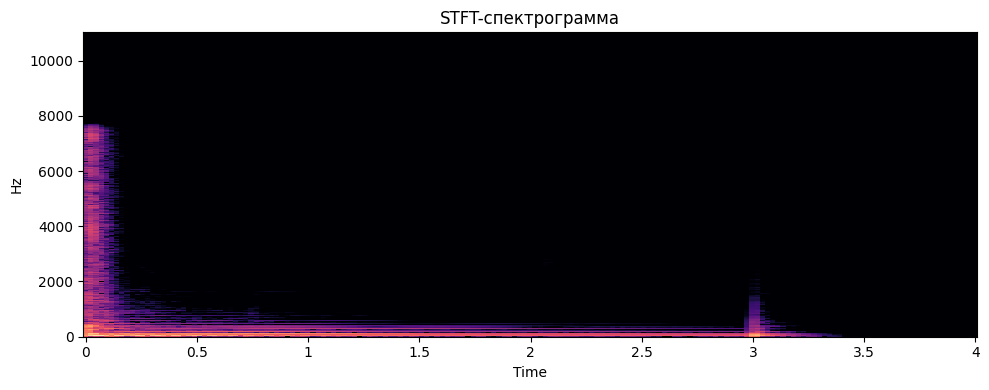

In [13]:
D = librosa.stft(class_counts_df.loc[1, 'audio'])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('STFT-спектрограмма')
plt.tight_layout()
plt.show()

In [14]:
S_db

array([[-27.282673, -41.74247 , -33.824112, ..., -80.      , -80.      ,
        -80.      ],
       [-23.081429, -20.816086, -22.913832, ..., -80.      , -80.      ,
        -80.      ],
       [-18.779837, -16.633999, -21.400269, ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], shape=(1025, 173), dtype=float32)

In [15]:
S_db.shape

(1025, 173)

### Mel-спектрограмма

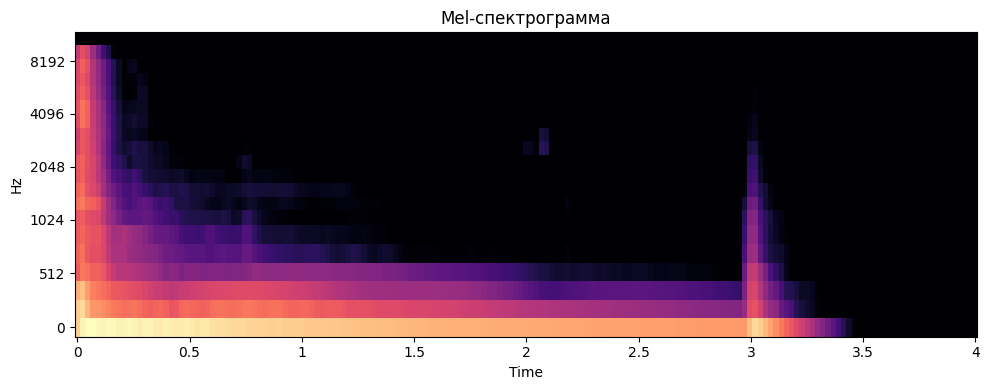

In [16]:
S = librosa.feature.melspectrogram(y=class_counts_df.loc[1, 'audio'], sr=sr, n_mels=20)
S_dB = librosa.power_to_db(S, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-спектрограмма')
plt.tight_layout()
plt.show()

In [17]:
S_dB

array([[ -8.3552265 ,  -1.9875183 ,  -0.18829918, ..., -80.        ,
        -80.        , -80.        ],
       [ -8.673727  ,  -6.224827  , -12.480913  , ..., -80.        ,
        -80.        , -80.        ],
       [-13.467632  , -10.505644  , -16.521688  , ..., -80.        ,
        -80.        , -80.        ],
       ...,
       [-33.155235  , -26.871613  , -30.175003  , ..., -80.        ,
        -80.        , -80.        ],
       [-37.82168   , -30.632662  , -33.793114  , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]], shape=(20, 173), dtype=float32)

In [18]:
S_dB.shape

(20, 173)